# 8. 2D Ising model

For a system of interacting spins on a 2D lattice of sites, the Hamiltonian describing the energy of interaction is
$$
  {\cal H} = - \sum_{i,j} J_{ij} s_i s_j -\mu \sum_j h_j s_j
$$
where the index $j$ runs over all spins on the lattice, while the index $i$ runs over those spins with which spin $s_j$ interacts, with the interaction strength $J_{ij}$. In the case of spin-1/2, each $s_j$ can take on values of +1 or -1.  Typical example is a nearest-neighbour interaction, on a square lattice implying interactions with spins directly North, South, East and West of site $j$. The sign of the interaction $J_{ij}$ determines whether the interaction favors (lowers the energy for) spins aligned parallel to their neighbours ($J_{ij}>0$, ferromagnetic), or anti-parallel to their neighbours ($J_{ij}<0$, antiferromagnetic). In the absence of spin-spin interactions, $J_{ij}=0$.  

The second sum describes the interaction of spins with an external field: $\mu$ is the unit of strength (a magnetic moment of a single spin) and $h_j$ represents the strength pf the field at site $j$.  Positive $h_j$ value implies that the alignment along the external field is energetically favourable, $h_j < 0$ favours spins aligning against the field, and $h_j=0$ indicates the absence of the external field.

The probability of encountering a particular configuration $\{s\}$ of spins on the lattice is given by the Boltzmann factor:
$$
  P(\{s\}) = \frac{e^{-{\cal H(\{s\})}/k_B T}}{\sum_{\{s\}} e^{-{\cal H(\{s\})}/k_B T}}
$$
with the sum over all possible configurations of the system in the denominator being the partition function $Z$.  Often the notation $\beta = 1/k_b T$ (the inverse temperature) is used; with that,
$$
  P(\{s\}) = \frac{1}{Z} e^{-\beta{\cal H(\{s\})}}
$$
In two or more dimensions, the Ising model exhibits interesting phase behaviour, including ferromagnetic phase transitions, and is widely studied.

The limitations of finite size of the model lattice of spins are normally overcome by imposing periodic boundary conditions.

In [1]:
%plot --format png -w 900 -h 600

In [2]:
### function to display the spin state of the system, on a rectangular lattice of spins
function DisplayIsing (S)
  [n,m] = size(S);
  N = round((n-1)/2);
  [X,Y] = meshgrid(-N:N,-N:N);
  quiver(X,Y-0.5*S,0*S,S,0,'color','blue');
  axis equal;
  xlim([-N-1,N+1]);
  ylim([-N-1,N+1]);
  axis off;
endfunction;

## Set up a 2D rectangular lattice of spins

Initial state will be a random orientation of $2N+1 \times 2N+1$ spins. Here we assume that all sites can only have the magnetic moment of $+\mu$ or $-\mu$. `rand()` produces a random number somewhere in the 0..1 range, and and a shift of -0.5 makes it equally likely for the sign to be up or down.

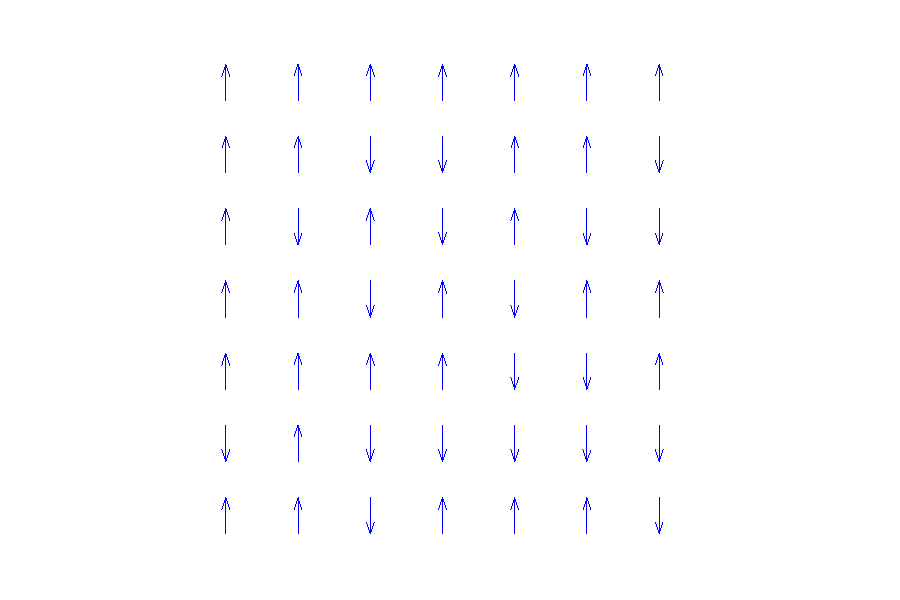

In [3]:
N=3;
mu=0.5;
S = mu*sign(rand(2*N+1, 2*N+1)-0.5);

DisplayIsing(S);

To visualize the state of the spin lattice, we can use colour to enhance the previous picture.  While we are at it, we can make the function a little more robust by adding error checking:

In [4]:
### function to display the spin state of the system, on a rectangular lattice of spins
function DisplayIsing (S,up_colour='blue', dn_colour='red')
  [n,m] = size(S);
  if (n != m)
    error("need a square matrix for S")
    endif
  N = round((n-1)/2);
  if (2*N+1 != n)
    error("matrix dimensions are not 2N+1 x 2N+1")
    endif
  [X,Y] = meshgrid(-N:N,-N:N);
  hold on;
  quiver(X,Y-0.5*S,0*S,S,0,'color',dn_colour);
  ### zero all negative values in S, repaint those that are +ve in up_colour
  S = ifelse(sign(S) == 1, S, 0);
  quiver(X,Y-0.5*S,0*S,S,0,'color',up_colour);
  hold off;
  axis equal;
  xlim([-N-1,N+1]);
  ylim([-N-1,N+1]);
  axis off;
endfunction;

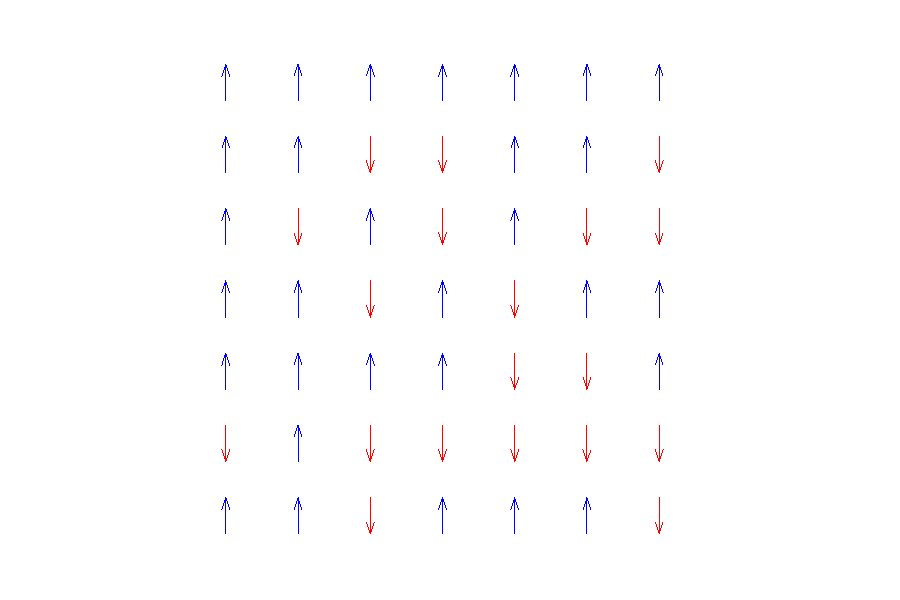

In [5]:
DisplayIsing(S);

## System evolves in time according to the rules encoded in `Evolve()`

Just as a demonstration, go through all spins in the system and randomly "flip" some of them. Setting the cutoff at the midpoint of the 0..1 interval should flip about a half of them. Going over the entire spin system once corresponds to a single step in the time evolution of the system.

In [6]:
### a single step in the evolution of the spin system
function S_out = Evolve (S_in)
  [n,m] = size(S_in);
  if (n != m)
    error("need a square matrix for S")
    endif
  N = round((n-1)/2);
  if (2*N+1 != n)
    error("matrix dimensions are not 2N+1 x 2N+1")
    endif
  S_out = S_in;
  for i = [1:n]
    for j = [1:m]
      ### for demo purposes, one possible "evolution" is to randomly flip some spins       
      if (rand() > 0.5)
        S_out(i,j) = - S_in(i,j);
      endif
    endfor
  endfor
endfunction

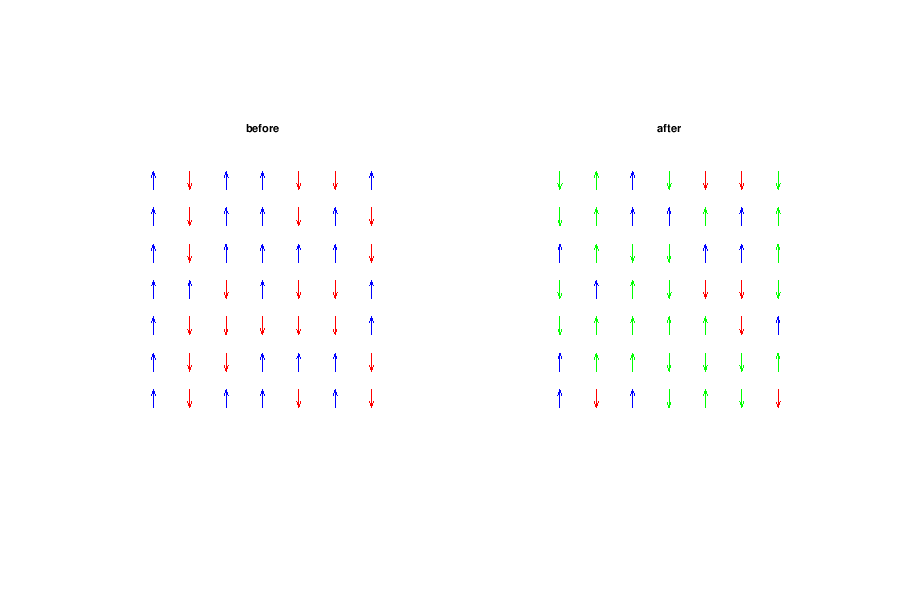

In [7]:
N=3;
rn = rand(2*N+1, 2*N+1);
mu=0.5;
S = mu*sign(rn-0.5);

clf;
subplot(1,2,1);
DisplayIsing(S);
title("before");

### apply a single step of evolution of the system, and see the result
S_now = Evolve(S);
  
subplot(1,2,2);
hold on;
DisplayIsing(S_now);
DisplayIsing(0.5*(S_now-S),'green','green');
hold off;
title("after")

## Monte-Carlo and $\pi$

The principle of Monte-Carlo sampling can be well illustrated by the following method of determining $\pi$, from the ratio of the area of a unit circle, $S_c = \pi r^2 = \pi$ and the area of the square that circumscribes it, $S_s = 2\times 2 = 4$.  Imagine randomly dropping stones anywhere inside the square, but counting how many stones fall inside the circle ($N_{in}$), and how many outside of the circle ($N_{out}$). If the probability of dropping a stone anywhere inside the square is equal, then the fraction of the total number of stones that fall inside the circle will correspond to the fraction that the area of the square that is occupied by the circle, i.e. 
$$
  \frac{N_{in}}{N_{in}+N_{out}} = \frac{S_c}{S_s} = \frac{\pi}{4}  
$$

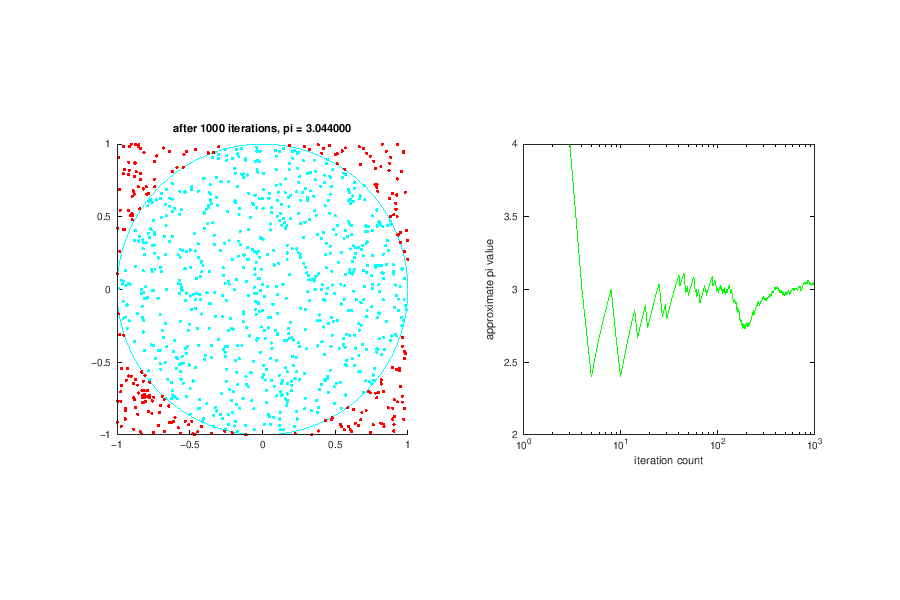

In [8]:
clf;
subplot(1,2,1);
hold on;
Pi = 2* acos(0);
theta = [0:0.01:2*Pi];
### unit circle, area = \pi*r^2 = \pi
plot(cos(theta),sin(theta),'c-');

x_in = [];
y_in = [];
x_out = [];
y_out = [];
val = [];

L = 1000;
for i = [1:L]
  x = 2*rand()-1.0;
  y = 2*rand()-1.0;
  if (x^2+y^2 <= 1.0)
    x_in = [x_in x];
    y_in = [y_in y];
  else
    x_out = [x_out x];
    y_out = [y_out y];
  endif
  n_in = size(x_in)(2);
  n_out = size(x_out)(2);
  val = [val 4*n_in/(n_in+n_out) ];
endfor

plot(x_in,y_in,'c.');
plot(x_out,y_out,'r.');
hold off;

### circumscribed square, area = 2x2=4
xlim([-1 1]);
ylim([-1 1]);
axis equal;
axis('square');
title(sprintf("after %d iterations, pi = %f",L,val(end)));

subplot(1,2,2);
semilogx([1:L],val,'g-');
xlabel('iteration count');
ylabel('approximate pi value');
axis('square');

## Metropolis algorithm

Given a configuration $\{s\}$, the evolution of the system is always toward <i>lower</i> total energy.  Therefore, for each spin one needs to:
<ul>
<li>flip the spin
<li>calculate the new total energy of the system
<li>if the energy is lowered by the flip, accept the new configuration, otherwise reject it and keep this spin as is
</ul>
A flip of a spin only affects the spins in the vicinity of this spin, i.e. the interactions are always local (for example over the four nearest-neighbour spins). Periodic boundary conditions take care of the edge spins, for example the East neighbour of the last spin in a row is the first spin in this row, etc.

Clearly, such an algorithm should move the system toward an "all up"/"all down" (depending on the external field) states of the system in the ferromagnetic configuration, and into a "checkerboard" patter of up/down spins in the case of the antiferromagnetic interaction. 

But how does one mimic a non-zero absolute temperature and the related fluctuations for such a system?

For any finite temperature, the fluctuations can be modeled by modifying the last step in the above algorithm:
<ul>
<li>if the energy is lowered by the flip, accept the new configuration, otherwise accept it only with probability $e^{-\beta{\cal H}}$
</ul>
In practice, this is achieved by generating a random number $r\in[0,1]$, and accepting the new configuration if $r < e^{-\beta{\cal H}}$  (even if the energy is increased by the flip).

Repeating this evolution step many times mimics the evolution of the spins system toward a thermal equilibrium with an imaginary "reservoir" at temperature $T$.  During this evolution,one can monitor the total energy ${\cal H}$ and the total magnetization $M$ of the system:
$$
  M = \mu \sum_j s_j
$$

## Plan of action

<ul>
<li>Modify `Evolve()` function to implement the Metropolis algorithm.
<li>Calculate total energy and magnetization and keep a record of these.
<li>Repeat until the values settle to a stable equilibrium value; may need to ignore some early states that may reflect the initial conditions, wait until those are "forgotten".
<li>Change the temperature and repeat, recording the equilibrium values and the extend of fluctuations for each temperature.
<li>Plot magnetization as a function of temperature, find the conditions for ferromagnetic and antiferromagnetic transitions by exploring a range of parameters.
<li>As an independent part of the project, modify to consider one of:
    <ul>
    <li>nearest- and next-nearest-neighbour interactions
    <li>triangular lattice
    <li>anisotropic spin-spin interactions, e.g. East-West coupling is different in strength from North-South coupling
    <li>lattice of spins that can re-orient at their sites, with the Hamiltonian given by
        $$
          {\cal H} = - J \sum_{i,j} \vec{s}_i \cdot \vec{s}_j -\mu \sum_j \vec{h} \cdot \vec{s}_j
        $$
        i.e. dependent on the [cos of the] angle between the two nearest-neigbour spins, and of each spin with the direction of external magnetic field.  Without loss of generality, one can assume that $\forall j, \vec{h}_j=\vec{h}=h\hat{k}$.
    </ul>
</ul>

In [9]:
### a single step in the evolution of the spin system; streamline it as much as possible
function Sij = Evolve (S,n,i,j)
  J = 1; ### >0 ferromagnetic, <0 antiferromagnetic
  ### wrap-around at boundary
  #printf("For (%d,%d) NN are: W=(%d,%d), E=(%d,%d), S=(%d,%d), N=(%d,%d)\n",...
  #  i,j,mod(i-2,n)+1,j, mod(i,n)+1,j, i,mod(j-2,m)+1, i,mod(j,m)+1);
  Snn = [ S(mod(i-2,n)+1,j) S(mod(i,n)+1,j) S(i,mod(j-2,n)+1) S(i,mod(j,n)+1) ];
  dE = J * S(i,j) * sum(Snn);
  if (dE < 0 )
    Sij = - S(i,j);
  else
    Sij = S(i,j);      
  endif 
endfunction

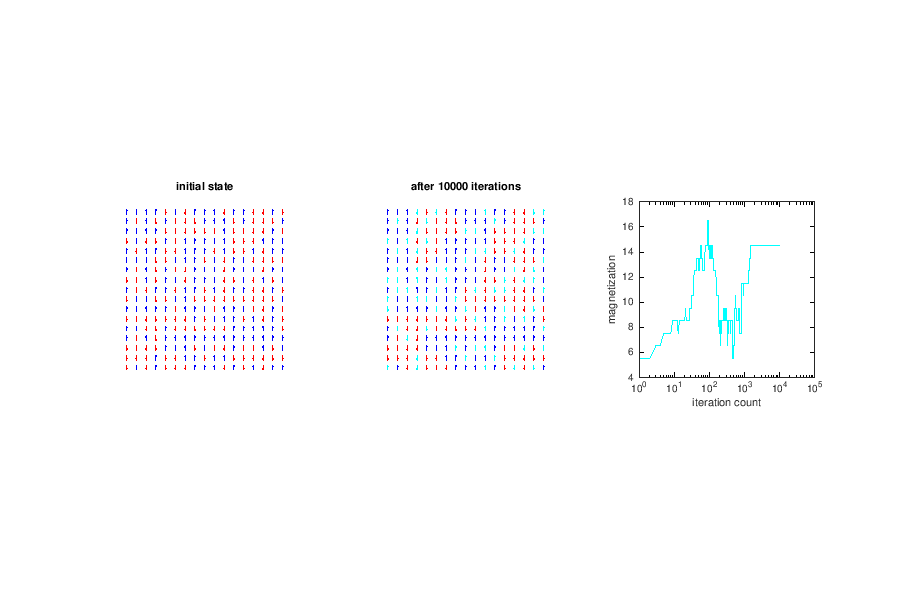

In [10]:
N = 8;
n = 2*N+1;
rn = rand(n);
mu = 0.5;
S = mu*sign(rn-0.5);

clf;
subplot(1,3,1);
DisplayIsing(S);
title("initial state");

S_1 = S;

M = [ sum(S(:)) ];
L = 10000;

for k = [1:L]
  i = randi(n);
  j = randi(n);
  S(i,j) = Evolve(S,n,i,j);
  M = [M sum(S(:))];
endfor

subplot(1,3,2);
hold on;
DisplayIsing(S,'blue');
DisplayIsing(0.5*(S-S_1),'cyan','cyan');
hold off;
title(sprintf("after %d iterations",L));

subplot(1,3,3);
semilogx([1:L+1],M,'c-');
xlabel('iteration count');
ylabel('magnetization');
axis('square');